## Task 3: Correlation between news and stock Movement

#### Importing libraries and modules

In [1]:
# reload the module
%load_ext autoreload
%autoreload 2 

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import os


In [3]:
import sys
from pathlib import Path

# Add the project root directory to sys.path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [4]:
#import data loader modules
from src.data_loader import DataLoader as news_dt
from src.y_finance_data_loader import DataLoader as y_finance_dt

#### Load both datasets

In [5]:
#load news data
news_df = pd.read_csv("../data/raw_analyst_ratings/raw_analyst_ratings.csv")
print(news_df.head())
# Convert the 'date' column to datetime with timezone UTC
news_df['date'] = pd.to_datetime(news_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)

# Convert news_df date to timezone-aware datetime
if news_df['date'].dt.tz is None:
    news_df['date'] = pd.to_datetime(news_df['date']).dt.tz_localize('UTC')
else:
    news_df['date'] = pd.to_datetime(news_df['date']).dt.tz_convert('UTC')

#load y finance data
directory = '../data/yfinance_data'
aligned_dfs = []
# List all files in the directory
file_names = os.listdir(directory)

for file_name in file_names:
    if os.path.isfile(os.path.join(directory, file_name)):
        print(os.path.join(directory, file_name))
        data_loader = y_finance_dt(os.path.join(directory, file_name))
        ticker_symbol = file_name.split('_')[0]
        df = data_loader.load_data()
        # Keep each dataframe in a variable with their ticker symbol
        locals()[ticker_symbol] = df
        

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

#### Align the datasets together


In [6]:
stock_data = {
    'AAPL': AAPL,
    'AMZN': AMZN,
    'MSFT': MSFT,
    'GOOG': GOOG,
    'META': META,
    'TSLA': TSLA
}
# perfom data alignment
aligned_dfs = []
for ticker, df in stock_data.items():

    # Convert the 'Date' column to datetime with timezone UTC
    df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize('UTC')

    # Filter stock data to start from the first date in the news data
    start_date = news_df['date'].min()
    filtered_stock_data = df[df['Date'] >= start_date]

    # Perform an inner join to keep only matching dates
    aligned_data = pd.merge(filtered_stock_data, news_df, left_on='Date', right_on='date', how='inner')

    # Add a column to identify the stock
    aligned_data['Stock'] = ticker

    # Append the aligned data to the list
    aligned_dfs.append(aligned_data)

# Concatenate all aligned data into one DataFrame
merged_data = pd.concat(aligned_dfs, ignore_index=True)



In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578468 entries, 0 to 7578467
Data columns (total 18 columns):
 #   Column           Dtype              
---  ------           -----              
 0   Date             datetime64[ns, UTC]
 1   Open             float64            
 2   High             float64            
 3   Low              float64            
 4   Close            float64            
 5   Adj Close        float64            
 6   Volume           int64              
 7   Dividends        float64            
 8   Stock Splits     float64            
 9   Unnamed: 0       int64              
 10  headline         object             
 11  url              object             
 12  publisher        object             
 13  date             datetime64[ns, UTC]
 14  stock            object             
 15  Stock            object             
 16  sentiment_score  float64            
 17  sentiment        object             
dtypes: datetime64[ns, UTC](2), float64(8), int

In [7]:
from src.visualization.visualize_correlation import Corr_Visualization

#### Visualize the stock price over time for each company


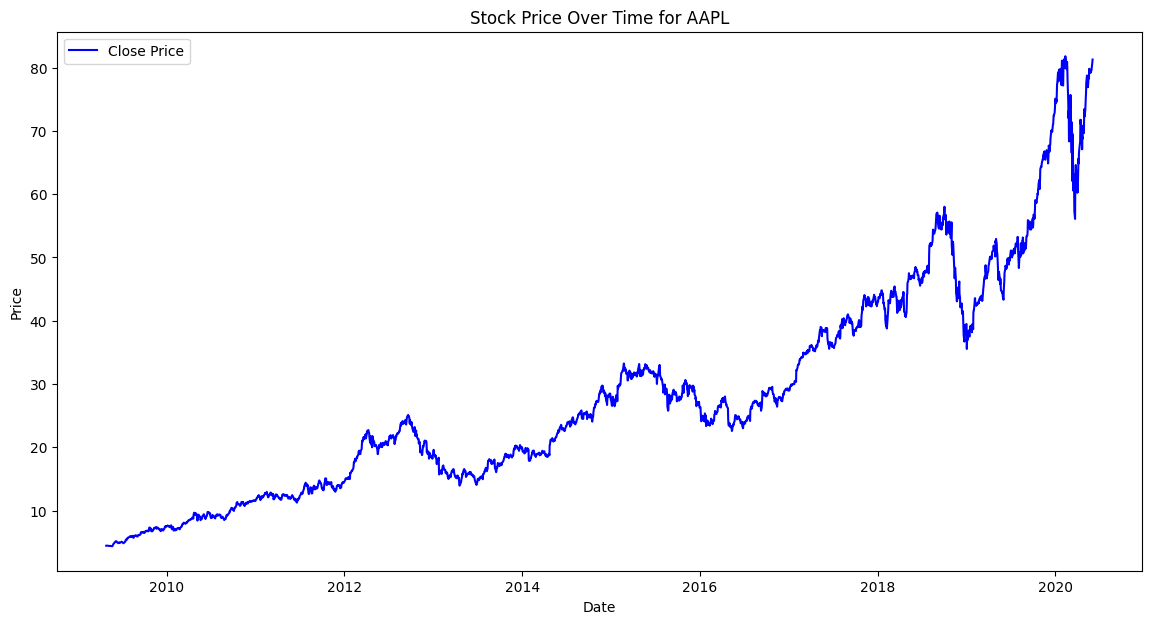

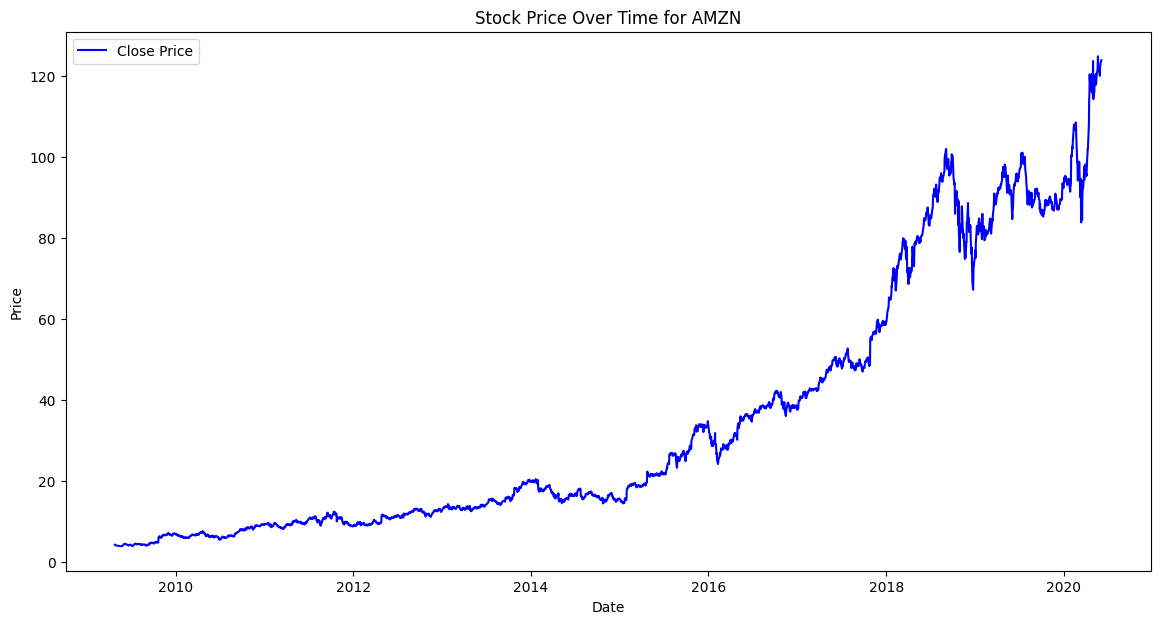

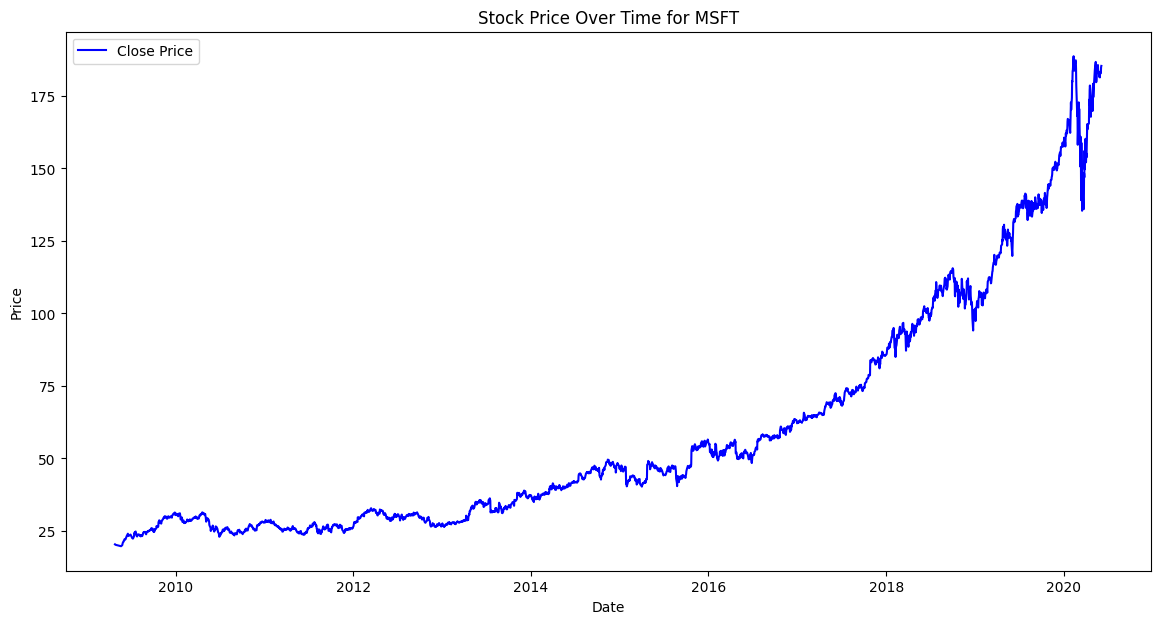

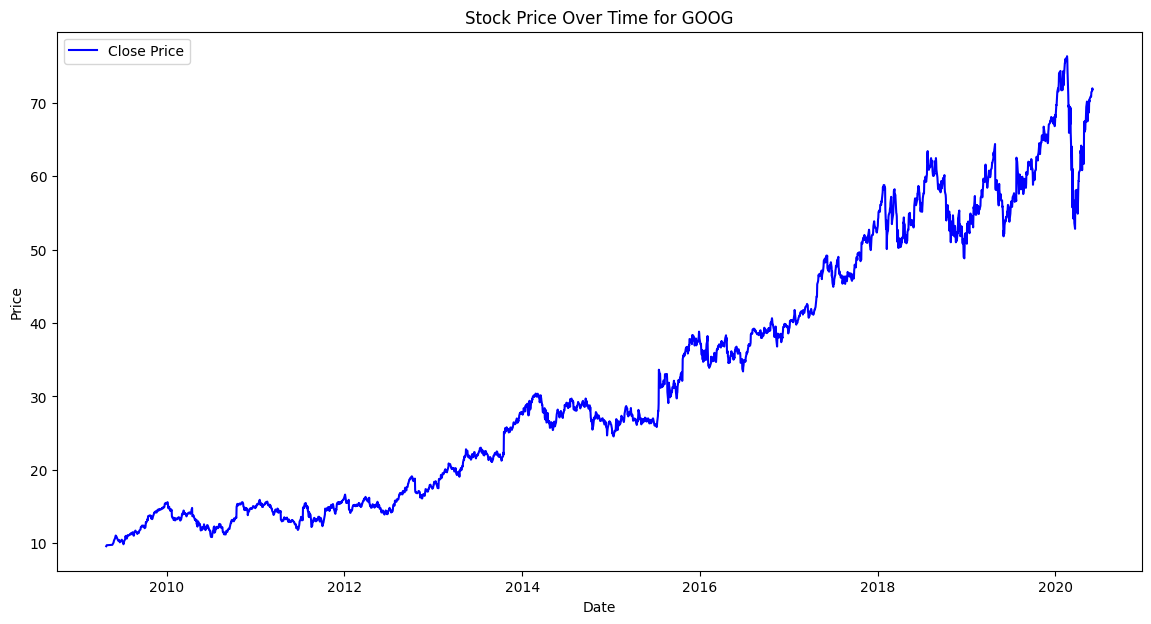

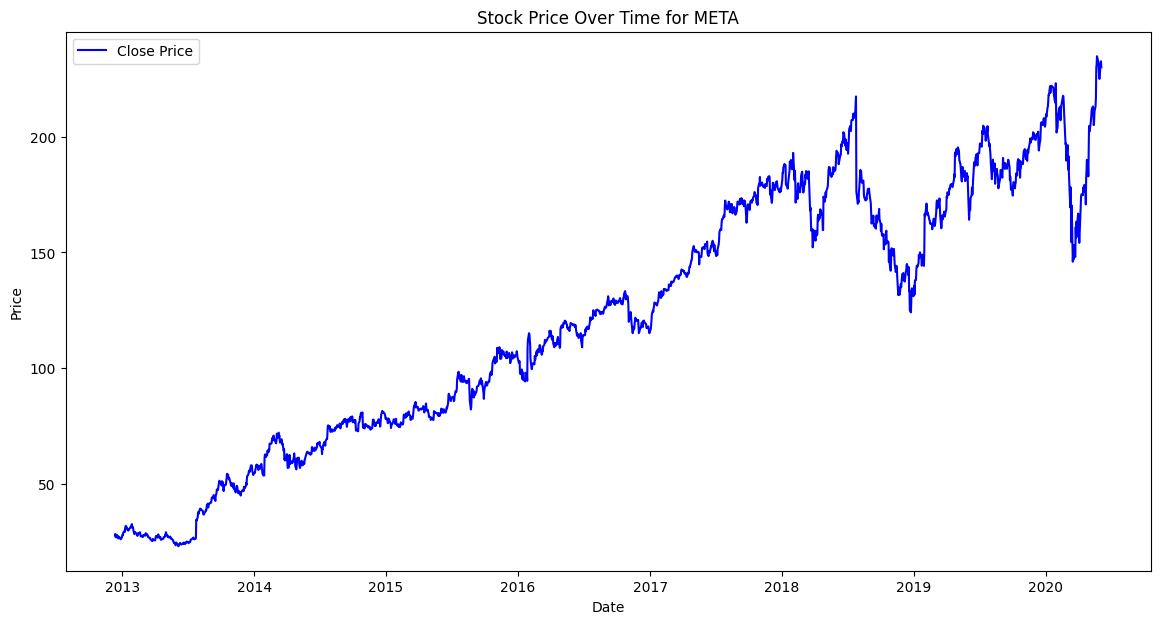

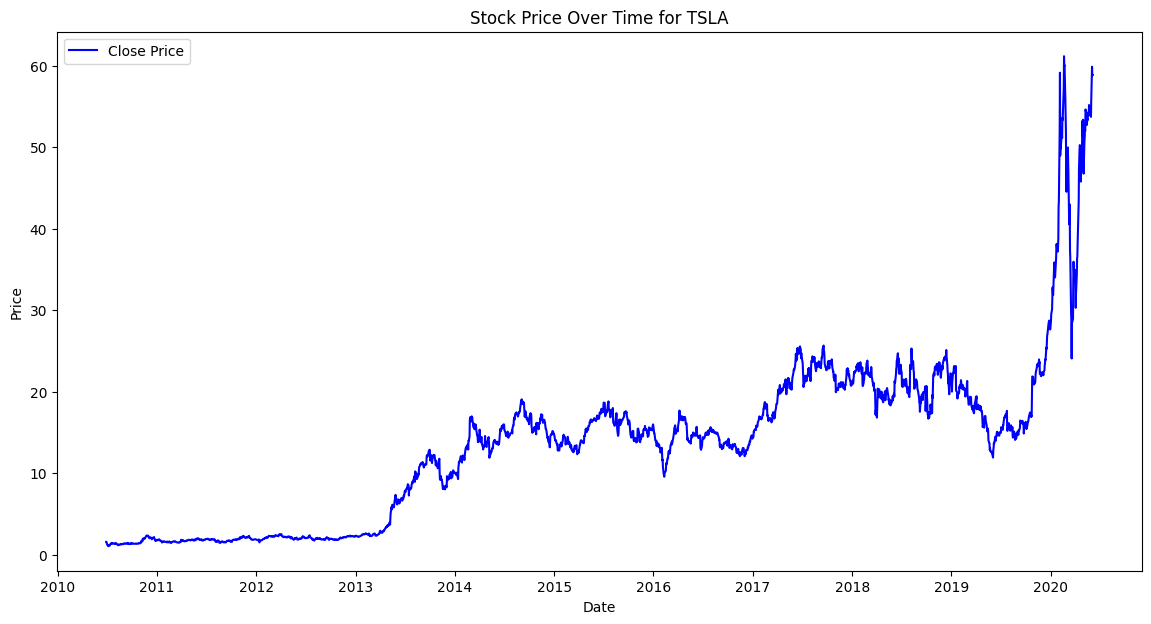

In [ ]:
# plot each stock's price over time
for ticker, df in stock_data.items():
    # Filter merged data for the current stock
    stock_data = merged_data[merged_data['Stock'] == ticker]
    
    # Visualize correlation
    viz = Corr_Visualization(stock_data)
    viz.stock_price()
    #viz.plot_pairplot()

#### Sentiment Analysis

In [10]:
# perform sentiment analysis
from src.eda.text_analysis import TextAnalysis
# Initialize sentiment analysis
sentiment_analysis = TextAnalysis(merged_data)
# perform sentiment analysis on the 'headline' column
merged_data['sentiment_score'], merged_data['sentiment'] = zip(*merged_data['headline'].apply(sentiment_analysis.analyze_sentiment))
print(merged_data[['headline', 'sentiment_score', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            headline  sentiment_score  \
0      Update on the Luxury Sector: 2nd Quarter 2009           0.0000   
1      Update on the Luxury Sector: 2nd Quarter 2009           0.0000   
2                             Going Against the Herd           0.0000   
3  Charles Sizemore Radio Interview Saturday Morning           0.0000   
4  MRM a $15-$20+ stock - FIT new information - J...           0.7925   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4  Positive  


#### Calculate daily return

In [13]:
# Calculate daily stock returns
merged_data['daily_return'] = merged_data.groupby('Stock')['Close'].pct_change()

In [18]:
# Group by stock and calculate correlations
correlations = merged_data.groupby('Stock').apply(lambda x: x[['sentiment_score', 'daily_return']].corr().iloc[0, 1])

print(correlations)

Stock
AAPL    0.002821
AMZN    0.002250
GOOG    0.002933
META    0.001177
MSFT    0.002417
TSLA    0.001382
dtype: float64


C:\Users\chall\AppData\Local\Temp\ipykernel_20016\1663408660.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = merged_data.groupby('Stock').apply(lambda x: x[['sentiment_score', 'daily_return']].corr().iloc[0, 1])


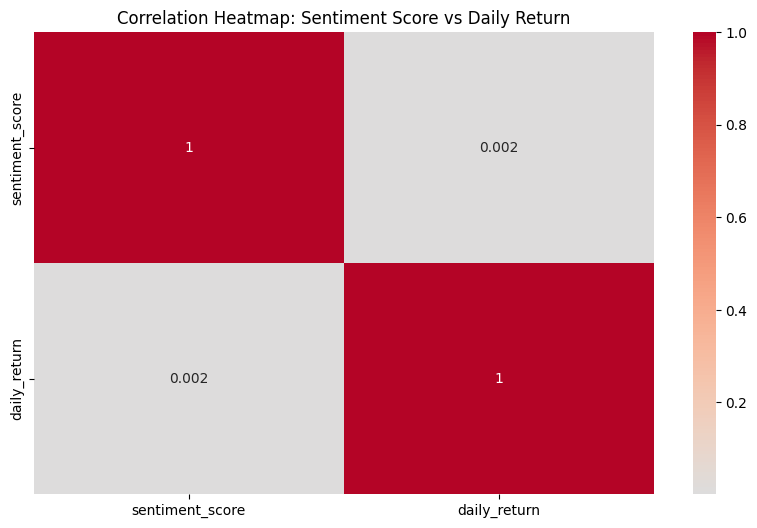

In [19]:
import seaborn as sns
from scipy.stats import pearsonr
# plot correlation between sentiment score and daily return
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data[['sentiment_score', 'daily_return']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap: Sentiment Score vs Daily Return")
plt.show()